In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create connection with SQL Server
server = 'server name'
database = 'database name'
driver = 'ODBC Driver 17 for SQL Server'
connection = f'mssql+pyodbc://{server}/{database}?driver={driver}'

engine = sql.create_engine(connection)


In [3]:
#Load table
df=pd.read_sql_table('hotel_booking', engine)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [5]:
df.shape

(119390, 32)

# Data cleaning And EDA

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Remove Unwanted Columns

df = df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
        #'name', 'email',
       #'phone-number', 'credit_card
        ]].copy()

In [8]:
df.shape

(119390, 32)

In [9]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [10]:
#Change Datatype of reservation_status_date column.

df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

C:\Users\petka\AppData\Local\Temp\ipykernel_13856\1697273951.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])


In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# Remove Columns contain very high null values

df.drop(['agent', 'company'],axis =1, inplace =True)

In [13]:
# Remove null values

df.dropna(inplace=True)

In [14]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [16]:
#remove Outlier from column adr

df= df[df['adr']<5000]

# Data analysis and Visualization

In [17]:
# Reservation status percentage

canceled_perc = df['is_canceled'].value_counts(normalize= True)
canceled_perc

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

###### We can see that around 37% reservations are canceled from total reservations.

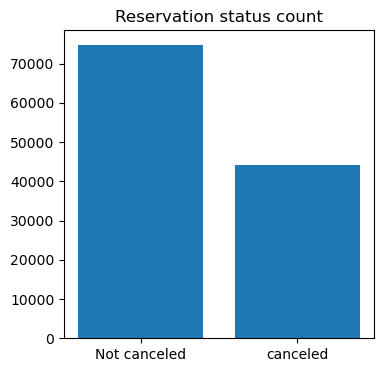

In [18]:
plt.figure(figsize= (4,4))
plt.bar(['Not canceled', 'canceled'],df['is_canceled'].value_counts())
plt.title('Reservation status count')
plt.show()

##### This graph shows that from total reservations around 40k reservations are canceled and around 75k reservations are not canceled.

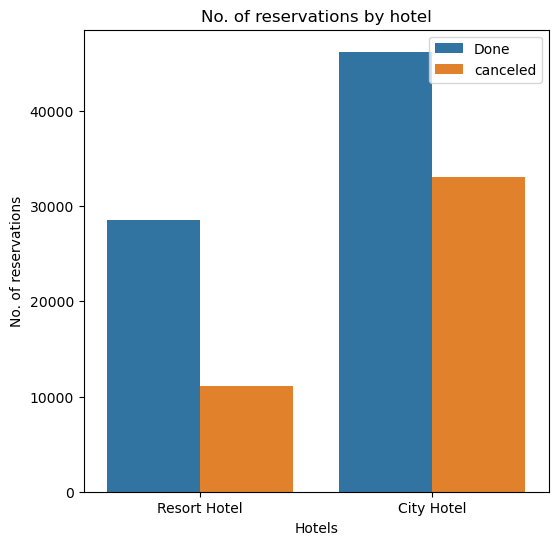

In [19]:
plt.figure(figsize= (6,6))
ab = sns.countplot(x= 'hotel',hue = 'is_canceled', data= df)
plt.title('No. of reservations by hotel')
plt.xlabel('Hotels')
plt.ylabel('No. of reservations')
plt.legend(['Done','canceled'], loc= 'upper right')


##### This graph show that city hotel contains more reservations and also it had more reservation canceled.

In [20]:
resort_hotel = df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize= True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

###### From resort hotels 27% reservations are canceled.

In [21]:
City_hotel = df[df['hotel']=='City Hotel']
City_hotel['is_canceled'].value_counts(normalize= True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

###### From city hotels 41% reservations are canceled.

In [22]:
# Create new column month

df['month'] = df['reservation_status_date'].dt.month

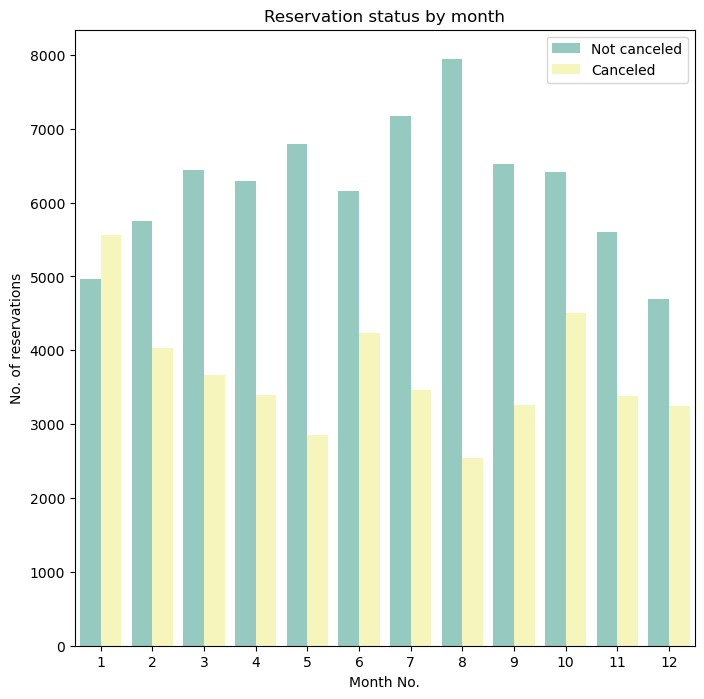

In [23]:
plt.figure(figsize =(8,8))
sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette= 'Set3')
plt.title('Reservation status by month')
plt.xlabel('Month No.')
plt.ylabel('No. of reservations')
plt.legend(['Not canceled', 'Canceled'])
plt.show()

##### This graph shows that in month of January lots of reservations are canceled and In month of august higesht transaction done and less no. of transaction are canceled

In [24]:
#Top 10 reservation canceled country
canceled_data = df[df['is_canceled']==1]
Top_10_country_by_canceled_data= canceled_data['country'].value_counts()[:10]

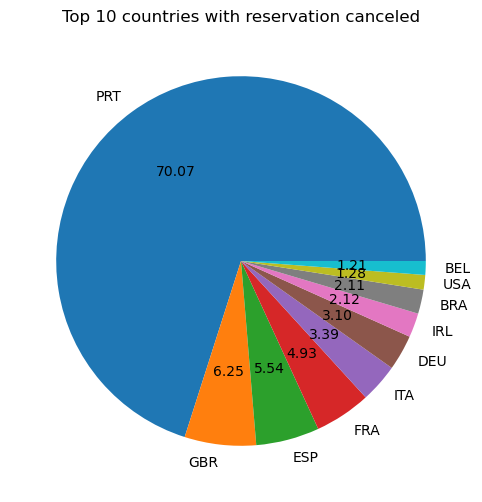

In [25]:
plt.figure(figsize=(8,6))
plt.pie(Top_10_country_by_canceled_data, autopct ='%.2f', labels=Top_10_country_by_canceled_data.index)
plt.title('Top 10 countries with reservation canceled')
plt.show()

##### This graph shows that around 70% of canceled transactions are from only Portugal country.

In [26]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

###### This shows that most of customers prefered to book reservation by Online method and very few no. of customers prefere Aviation, Complementary method to book reservation.

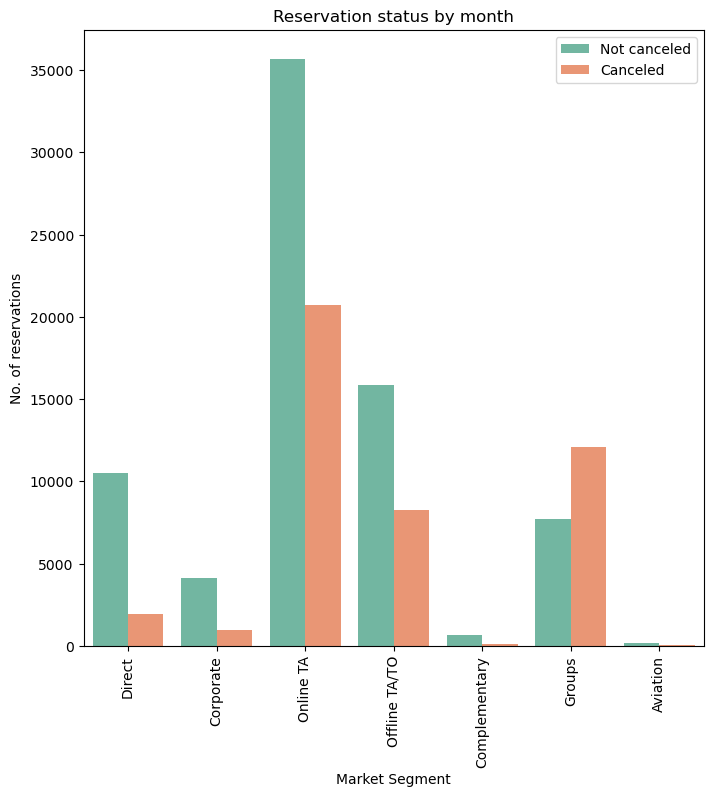

In [27]:
plt.figure(figsize =(8,8))
sns.countplot(x = 'market_segment', hue = 'is_canceled', data = df, palette='Set2')
plt.title('Reservation status by month')
plt.xlabel('Market Segment')
plt.ylabel('No. of reservations')
plt.legend(['Not canceled', 'Canceled'])
plt.xticks(rotation=90)
plt.show()

##### This graph shows that most of the customers from Group segment canceled reservation and customers who did the direct reservation the reservation cancellation is low.

# Conclusion :
##### 1.Around 35% reservations are canceled from total reservations.
##### 2. From total reservations  around 75k reservations are not canceled.
##### 3. City hotel contains more reservations and also it had more reservation canceled.
##### 4. From resort hotels 27% reservations are canceled.
##### 5.From city hotels 41% reservations are canceled.
##### 6. In month of January lots of reservations are canceled and In month of august higesht reservations done and less no. of reservations are canceled
##### 7. Around 70% of canceled transactions are from only Portugal country.
##### 8. Most of customers prefered to book reservation by Online method and very few no. of customers prefere Aviation, Complementary method to book reservation.

